## 1. Importing the dependencies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install numpy==1.24.4 pandas==1.5.3 scikit-learn==1.3.2



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #used to convert categorical labels into numeric form.
from imblearn.over_sampling import  SMOTE #used to handle imbalanced datasets in machine learning.
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier #is a powerful machine learning model for classification tasks.
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle




## 2. Data loading and understanding

In [3]:
#read the csv data to a panda dataset
df=pd.read_csv("/content/drive/MyDrive/Machine Learning /autism prediction/train.csv")

In [4]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [5]:
df.shape

(800, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [7]:
#convert age column datatype to integer
df["age"]=df["age"].astype(int)

In [8]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [9]:
for col in df.columns:
  numerical_features=["ID","age","result"]
  if col not in numerical_features:
    print(col,df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [10]:
#dropping ID and age_desc column
#as ID and age_desc are not affecting the target
df=df.drop(columns=["ID","age_desc"])

In [11]:
df.shape

(800, 20)

In [12]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [13]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [14]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [15]:
#define the mapping dictionary for country names
mapping={
    "Viet Nam":"Vietnam",
    "AmericanSamoa":"United States",
    "Honk Kong":"China"
}

#replace value in the country column
df["contry_of_res"]=df["contry_of_res"].replace(mapping) #this will replace all keys of dict with values in the df...

In [16]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong', 'Angola',
       'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [17]:
#target class distribution
df["Class/ASD"].value_counts()
#there is a class imbalance of 6:1 in the target.

,Class/ASD
0,639
1,161


**Insights:**
1. missing values in ethinicity
2. age_desc column has only 1 unique value so its removed.
3. fixed country names
4. class imbalance in the target

## 3. Explarotary Data Analysis (EDA)


In [18]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Univariate Analysis** (analysing one variable at a time)

Numerical columns:
- age
- result

In [19]:
#set the desired theme
sns.set_theme(style="darkgrid")

Mean:  27.96375
Median:  24.0


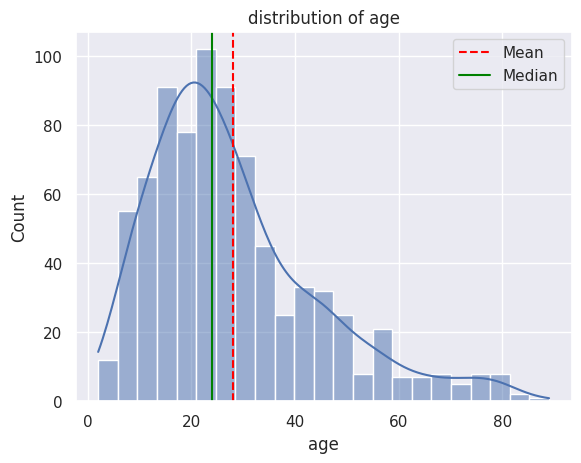

In [20]:
#Histrogram for age
sns.histplot(df["age"],kde=True) #kde draws a smooth curve to depict distribution
plt.title("distribution of age")

#calculate mean and median
age_mean=df["age"].mean()
age_median=df["age"].median()
print("Mean: ",age_mean)
print("Median: ",age_median)

#add vertical lines for mean and median
plt.axvline(age_mean,color="red",linestyle="--",label="Mean")
plt.axvline(age_median,color="green",linestyle="-",label="Median")
plt.legend()

plt.show()

Mean:  8.537303106501248
Median:  9.605299308


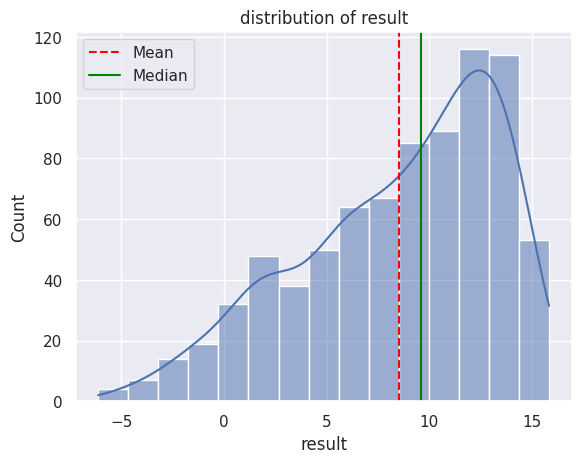

In [21]:
#Histrogram for result
sns.histplot(df["result"],kde=True) #kde draws a smooth curve to depict distribution
plt.title("distribution of result")

#calculate mean and median
result_mean=df["result"].mean()
result_median=df["result"].median()
print("Mean: ",result_mean)
print("Median: ",result_median)

#add vertical lines for mean and median
plt.axvline(result_mean,color="red",linestyle="--",label="Mean")
plt.axvline(result_median,color="green",linestyle="-",label="Median")
plt.legend()

plt.show()

 Box plots for identifying outliers in numerical columns

It summarizes a feature using:

- Minimum (excluding outliers)
- 1st Quartile (Q1) – 25% of data lies below this
- Median (Q2) – middle value
- 3rd Quartile (Q3) – 75% of data lies below this
- Maximum (excluding outliers)
- Outliers – unusually low or high values shown as dots

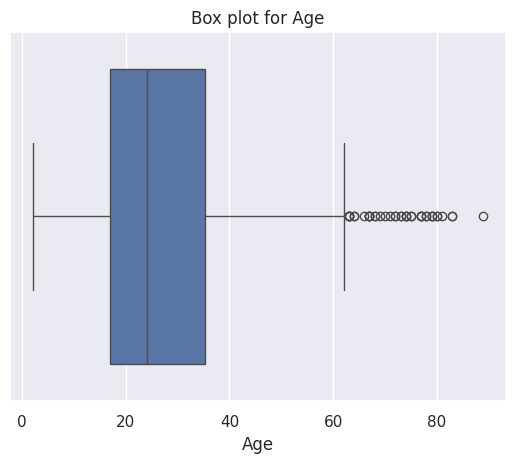

In [22]:
#box plot
sns.boxplot(x=df["age"])
plt.title("Box plot for Age")
plt.xlabel("Age")
plt.show()

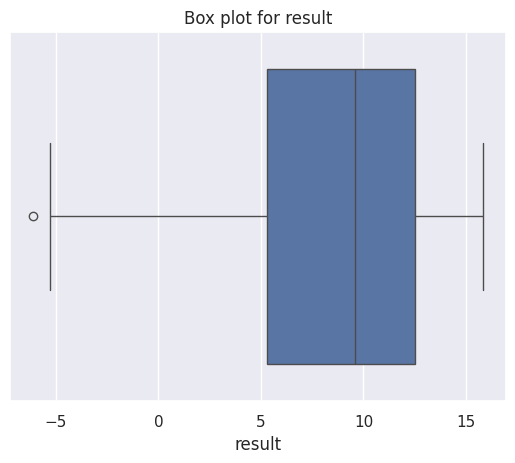

In [23]:
#box plot
sns.boxplot(x=df["result"])
plt.title("Box plot for result")
plt.xlabel("result")
plt.show()

In [24]:
# count the outliers using IQR method
Q1=df["age"].quantile(0.25)
Q3=df["age"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
age_outliers=df[(df["age"]<lower_bound) | (df["age"]>upper_bound)]

In [25]:
len(age_outliers)

39

In [26]:
# count the outliers using IQR method
Q1=df["result"].quantile(0.25)
Q3=df["result"].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
result_outliers=df[(df["result"]<lower_bound) | (df["result"]>upper_bound)]

In [27]:
len(result_outliers)

1

Categorical Columns

In [28]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

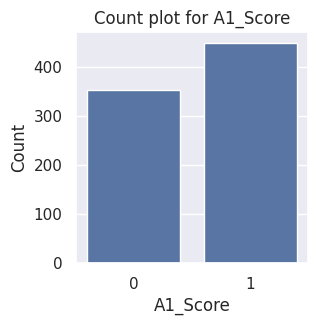

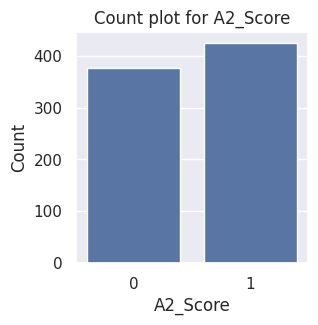

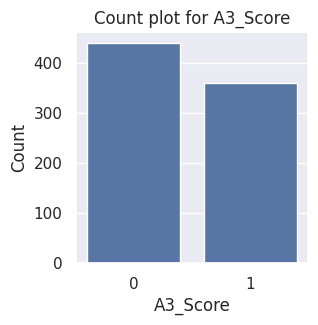

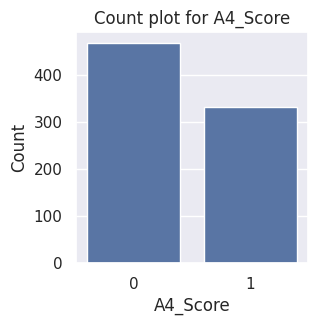

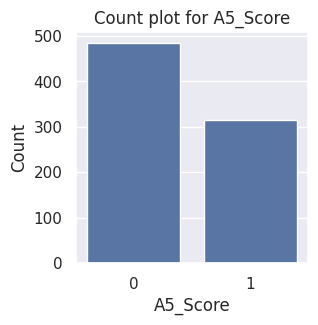

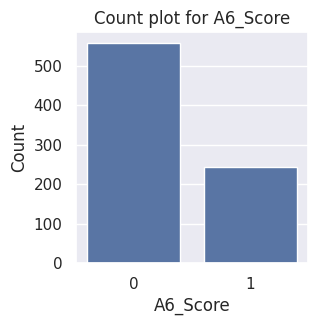

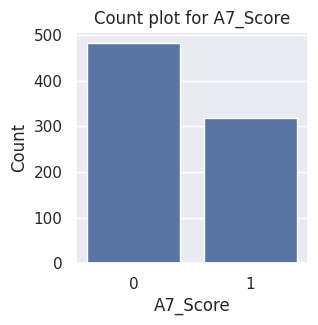

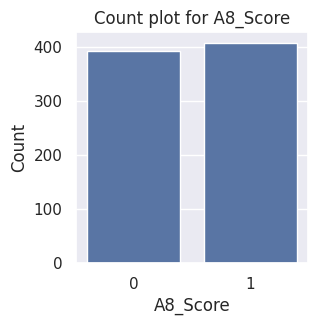

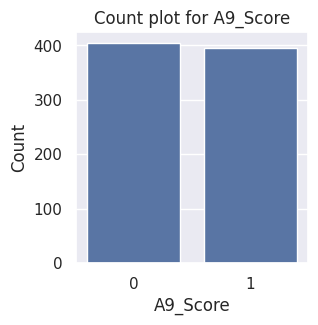

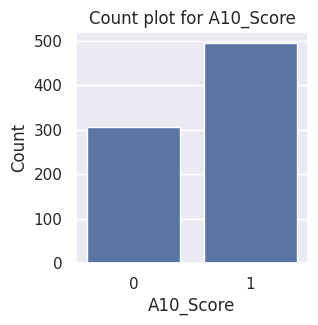

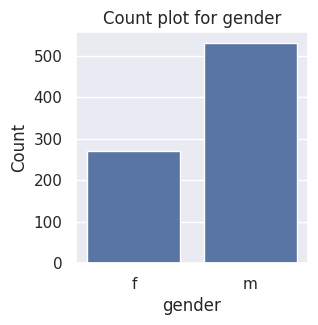

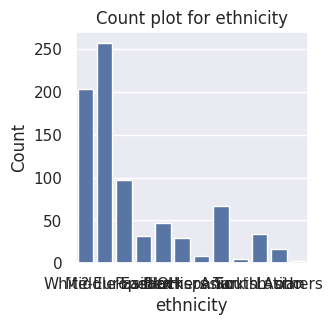

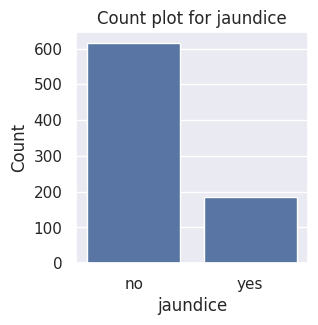

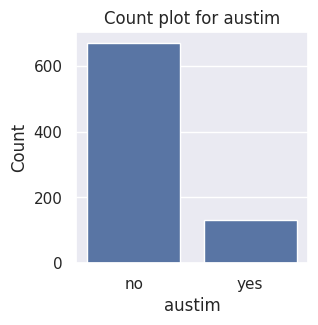

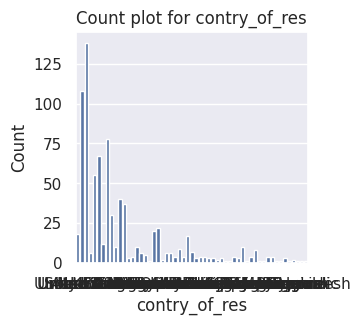

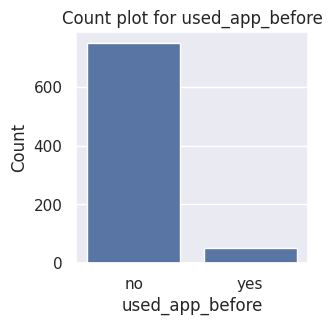

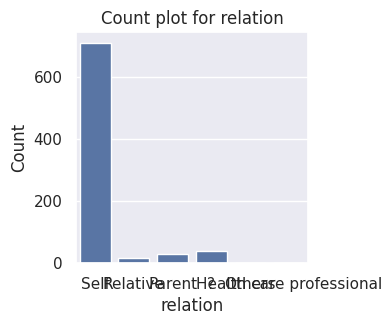

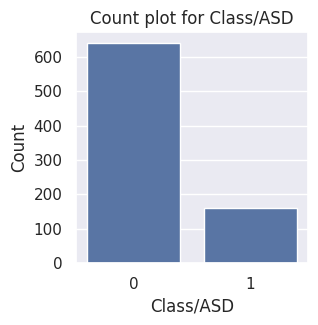

In [29]:
categorical_columns=['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before','relation', 'Class/ASD']

for col in categorical_columns:
  plt.figure(figsize=(3,3))
  sns.countplot(x=df[col])
  plt.title(f"Count plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

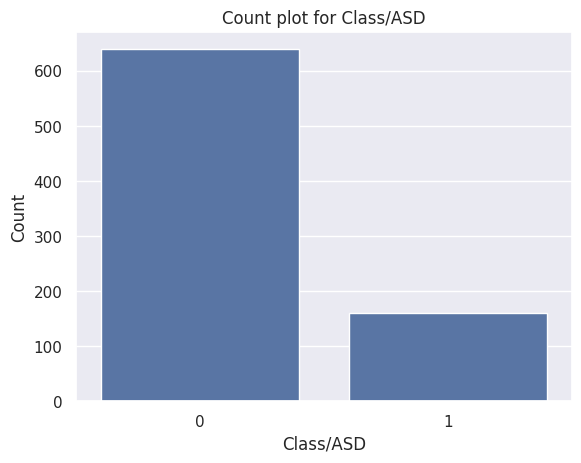

In [30]:
#countplot for target column
sns.countplot(x=df["Class/ASD"])
plt.title(f"Count plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [31]:
df["Class/ASD"].value_counts()

,Class/ASD
0,639
1,161


  **Handle missing values in ethnicity and relation column**

In [32]:
df["ethnicity"]=df["ethnicity"].replace({"?":"Others",
                                         "others":"Others"})

In [33]:
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [34]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [35]:
df["relation"]=df["relation"].replace({"?":"Others",
                                       "Relative":"Others",
                                       "Parent":"Others",
                                       "Health care professional":"Others"})

In [36]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

**Label Encoding**

In [37]:
#identify columns with object data type
object_columns=df.select_dtypes(include=["object"]).columns
object_columns

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

In [38]:
#initialize a dictionary to store encoders
encoders={}

#apply label encoding and store the encoders
for column in object_columns:
  label_encoder=LabelEncoder()
  df[column]=label_encoder.fit_transform(df[column])
  encoders[column]=label_encoder #saving the encoder for this column

#save the encoders as a pickle file
with open("encoders.pkl","wb") as f:
  pickle.dump(encoders,f)

In [39]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [40]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,24,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,53,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,53,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,45,0,-4.777286,1,0


**Bivariate Analysis**

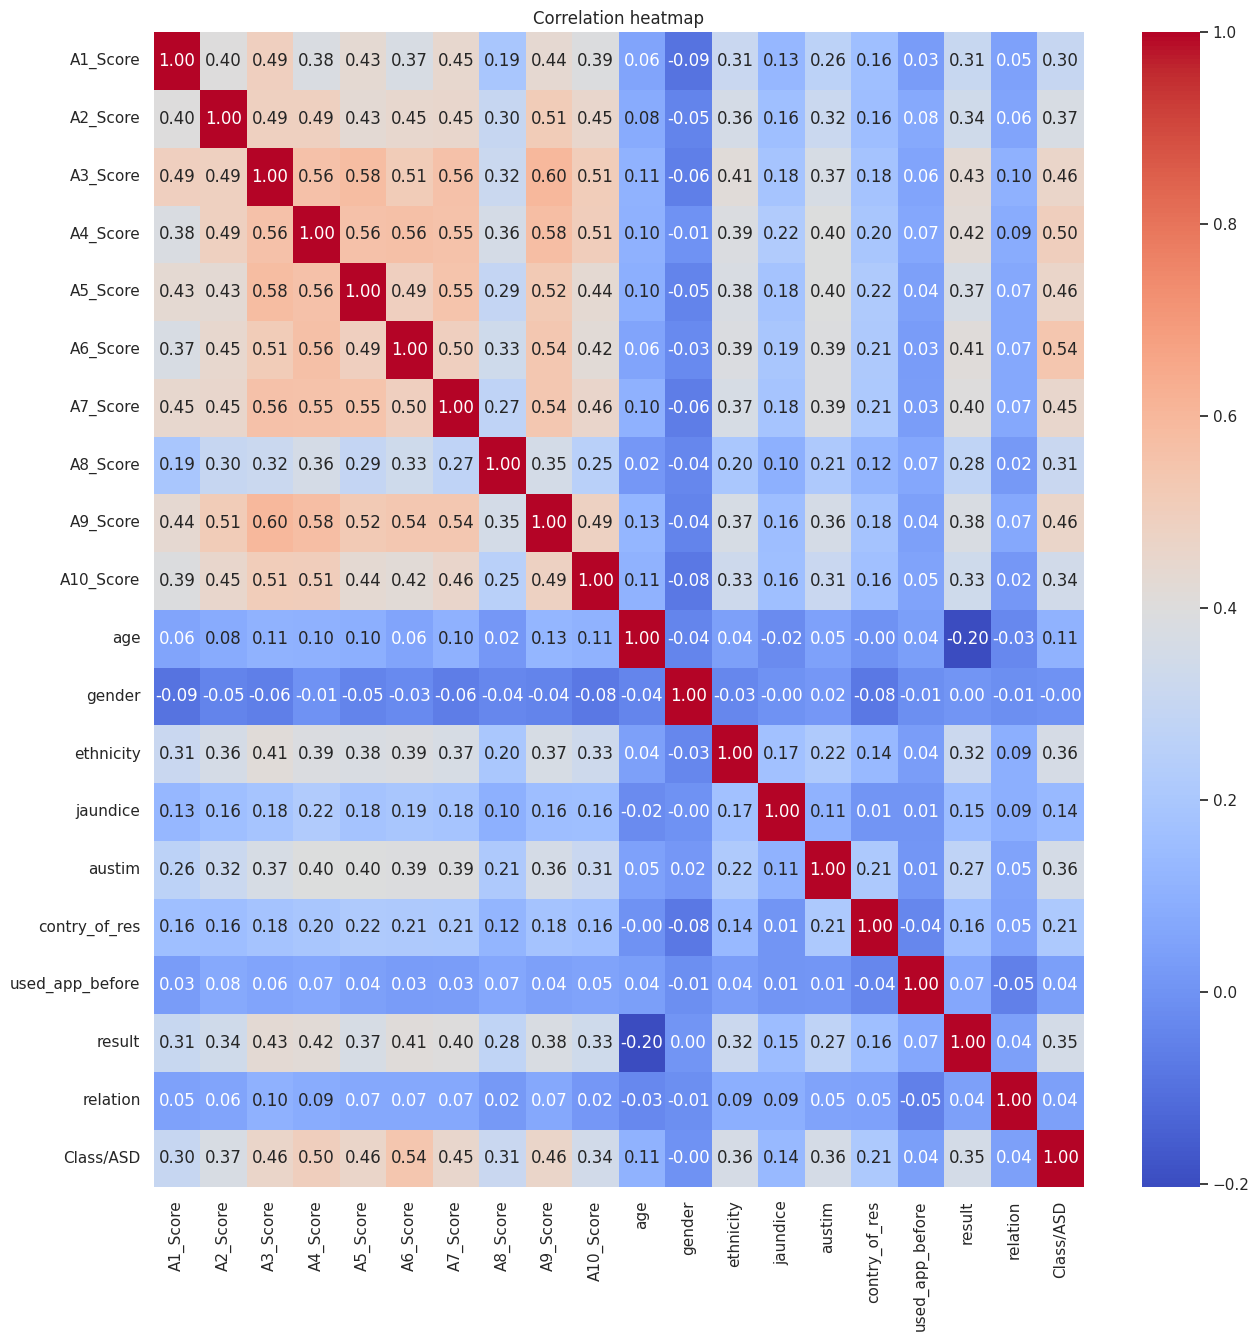

In [41]:
#correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt="0.2f")
plt.title("Correlation heatmap")
plt.show()

**Insights from EDA:**
- There are few outliers in the numerical columns (age,results)
- There is a class imbalance in the target column
- There is a class imbalance in the categorical features
- We dont have any correlated columns (as observed through correlation matrix or heatmap)
- Performed label encoding and saved the encoders

## 4. Data preprocessing

Handling the outliers

In [42]:
#function to replace the outliers with median
def replace_outliers_with_median(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1

  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR

  median=df[column].median() #we generally replace outliers with median not mean

  #replace outliers with median value
  df[column]=df[column].apply(lambda x: median if x<lower_bound or x>upper_bound else x)

  return df

In [43]:
#replace outliers in the age column
df=replace_outliers_with_median(df,"age")

#replace outliers in the age column
df=replace_outliers_with_median(df,"result")

In [44]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,24,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,53,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,53,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,45,0,-4.777286,1,0


In [45]:
df.shape

(800, 20)

**Train test split**

In [46]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [47]:
X=df.drop(columns=["Class/ASD"])
y=df["Class/ASD"]

In [48]:
X.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,24,0,2.255185,1
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,53,0,14.851484,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,53,0,2.276617,1
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,45,0,-4.777286,1


In [49]:
y.head()

,Class/ASD
0,0
1,0
2,1
3,0
4,0


In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
y_train.shape,y_test.shape

((640,), (160,))

In [52]:
y_train.value_counts()

,Class/ASD
0,515
1,125


SMOTE (Synthetic Minority Oversampling Technique)

In [53]:
smote=SMOTE(random_state=42)

In [54]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [55]:
y_train_smote.shape

(1030,)

In [56]:
y_train_smote.value_counts()

,Class/ASD
1,515
0,515


## 5. Model Training

In [57]:
# dictionary of classifiers
models={
    "Decision tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [58]:
# dictionary to store the cross validaiton results
cv_scores={}

#perform 5-fold cross validation for each model
for model_name,model in models.items():
  print(f"training {model_name} with default parameter...")
  scores=cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring="accuracy")
  cv_scores[model_name]=scores
  print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores):.2f}")
  print("-"*50)

training Decision tree with default parameter...
Decision tree Cross-Validation Accuracy: 0.86
--------------------------------------------------
training Random Forest with default parameter...
Random Forest Cross-Validation Accuracy: 0.92
--------------------------------------------------
training XGBoost with default parameter...
XGBoost Cross-Validation Accuracy: 0.90
--------------------------------------------------


In [59]:
cv_scores

{'Decision tree': array([0.79126214, 0.89320388, 0.87864078, 0.85436893, 0.8592233 ]),
 'Random Forest': array([0.91262136, 0.93203883, 0.91747573, 0.91262136, 0.91747573]),
 'XGBoost': array([0.86407767, 0.91747573, 0.91262136, 0.89805825, 0.91747573])}

## 6. Model Selection & Hyperparameter Tuning

In [60]:
#initializing models
decision_tree=DecisionTreeClassifier(random_state=42)
random_forest=RandomForestClassifier(random_state=42)
xgboost_classifier=XGBClassifier(random_state=42)

In [61]:
#hyperparameter grids for RandomizedSearchCV

param_grid_dt={
    "criterion":["gini","entropy"],
    "max_depth":[None,10,20,30,50,70],
    # "min_samples_split":[2,5,10],
    # "min_samples_leaf":[1,2,4]
}

param_grid_rf={
    "n_estimators":[50,100,200,500],
    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "bootstrap":[True,False]
}

param_grid_xgb={
    "n_estimators":[50,100,200,500],
    "max_depth":[3,5,7,10],
    "learning_rate":[0.01,0.1,0.2,0.3],
    "subsample":[0.5,0.7,1.0],
    "colsample_bytree":[0.5,0.7,1.0]
}

In [62]:
#hyperparameter tuning 3 tree based models

#the below steps can be automated by using a for loop or by using a pipeline

#perform RandomizedSearchCV for each model
random_search_dt=RandomizedSearchCV(estimator=decision_tree,param_distributions=param_grid_dt)
random_search_rf=RandomizedSearchCV(estimator=random_forest,param_distributions=param_grid_rf)
random_search_xgb=RandomizedSearchCV(estimator=xgboost_classifier,param_distributions=param_grid_xgb)


In [63]:
#fit the models
random_search_dt.fit(X_train_smote,y_train_smote)
random_search_rf.fit(X_train_smote,y_train_smote)
random_search_xgb.fit(X_train_smote,y_train_smote)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]})

In [64]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

print("-"*80)

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)

print("-"*80)

print(random_search_xgb.best_estimator_)
print(random_search_xgb.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
0.8815533980582526
--------------------------------------------------------------------------------
RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=500, random_state=42)
0.9242718446601941
--------------------------------------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_

In [65]:
# Get the model with best score
best_model=None
best_score=0

if random_search_dt.best_score_>best_score:
  best_model=random_search_dt.best_estimator_
  best_score=random_search_dt.best_score_

if random_search_rf.best_score_>best_score:
  best_model=random_search_rf.best_estimator_
  best_score=random_search_rf.best_score_

if random_search_xgb.best_score_>best_score:
  best_model=random_search_xgb.best_estimator_
  best_score=random_search_xgb.best_score_

In [66]:
print(f"Best Model: {best_model}")
print(f"Best Cross-validation Acuuracy: {best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=500, random_state=42)
Best Cross-validation Acuuracy: 0.92


In [67]:
#save the best model
with open("best_model.pkl","wb") as f:
  pickle.dump(best_model,f)

## 7.Evaluation

In [68]:
#evaluate on test data
y_test_pred=best_model.predict(X_test)
print("Accuracy score: ",accuracy_score(y_test,y_test_pred))
print("Confusion matrix:\n ",confusion_matrix(y_test,y_test_pred))
print("Classificaiton report:\n ",classification_report(y_test,y_test_pred))

Accuracy score:  0.83125
Confusion matrix:
  [[108  16]
 [ 11  25]]
Classificaiton report:
                precision    recall  f1-score   support

           0       0.91      0.87      0.89       124
           1       0.61      0.69      0.65        36

    accuracy                           0.83       160
   macro avg       0.76      0.78      0.77       160
weighted avg       0.84      0.83      0.83       160



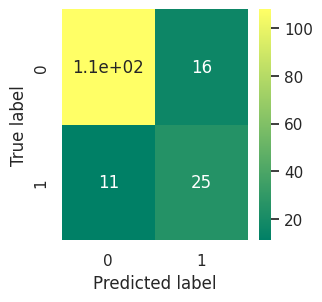

In [69]:
def plot_conf_mat(y_test,y_preds):
    """ plots a nice looking confusion matrix using seaborn's heatmap() """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=True,
                   cmap="summer")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")

plot_conf_mat(y_test,y_test_pred)
plt.show()

In [70]:
import sklearn
print("numpy version: ",np.__version__)
print("pandas version: ",pd.__version__)
print("sklearn version: ",sklearn.__version__)

numpy version:  1.24.4
pandas version:  1.5.3
sklearn version:  1.3.2
